# Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Data Collection

In [4]:
updated=pd.read_csv('shopping_behavior_updated.csv')
trends=pd.read_csv('shopping_trends.csv')
up=updated.copy()
tre=trends.copy()

# EDA

## Basic EDA

In [7]:
def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print('Duplicate Rows', df[dups])
    plt.figure(figsize=(10, 12))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

A Overview about the update dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 


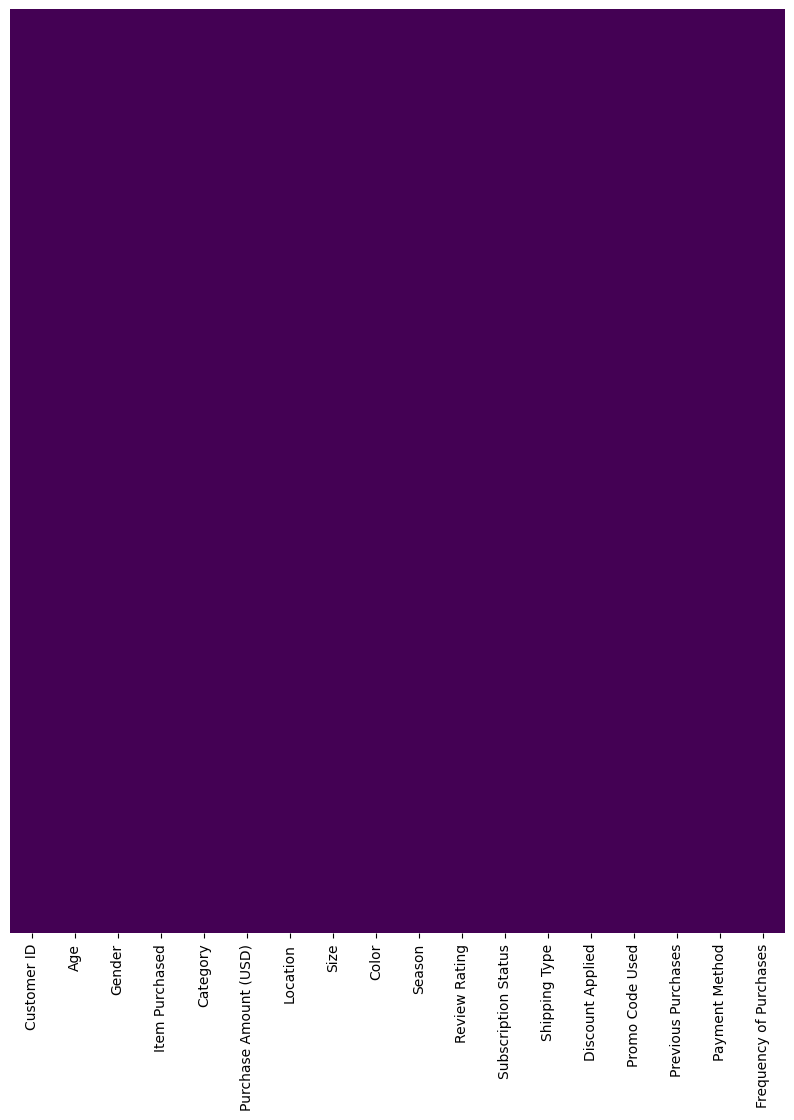

In [8]:
dataoverview(up, 'A Overview about the update dataset')

A Overview about the trends dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type     

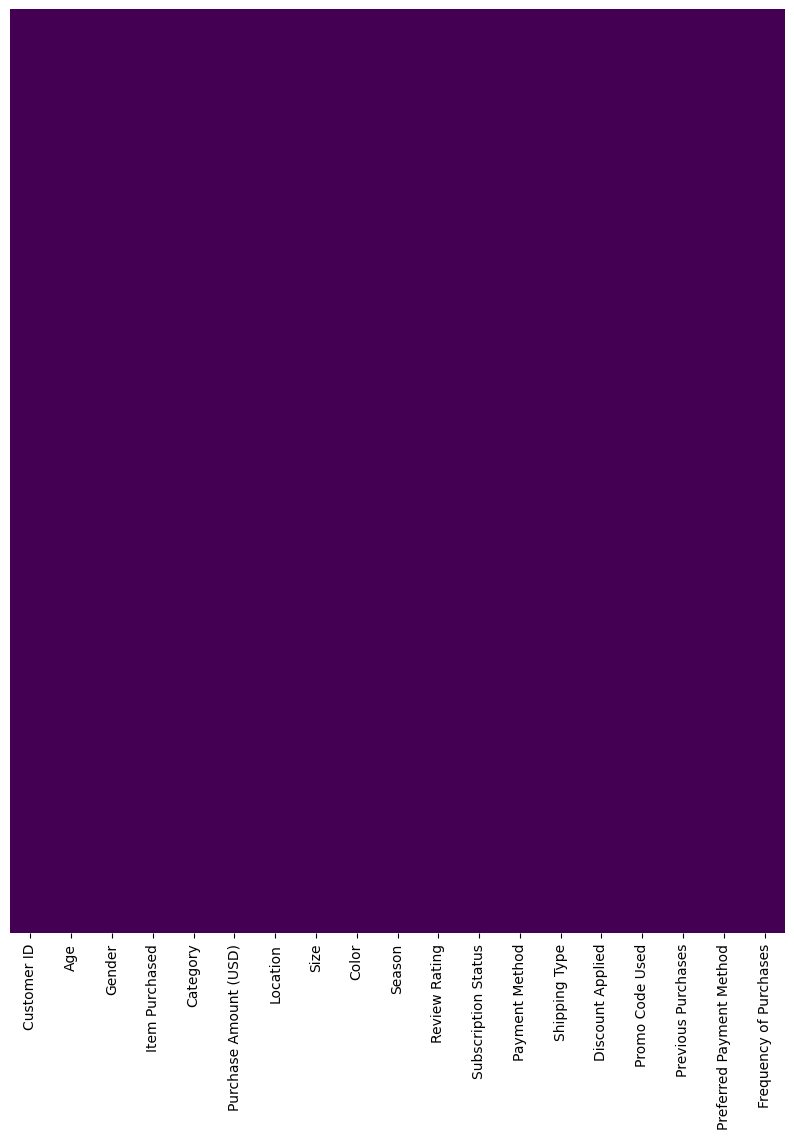

In [9]:
dataoverview(tre, 'A Overview about the trends dataset')

## Plot charts to understand the data

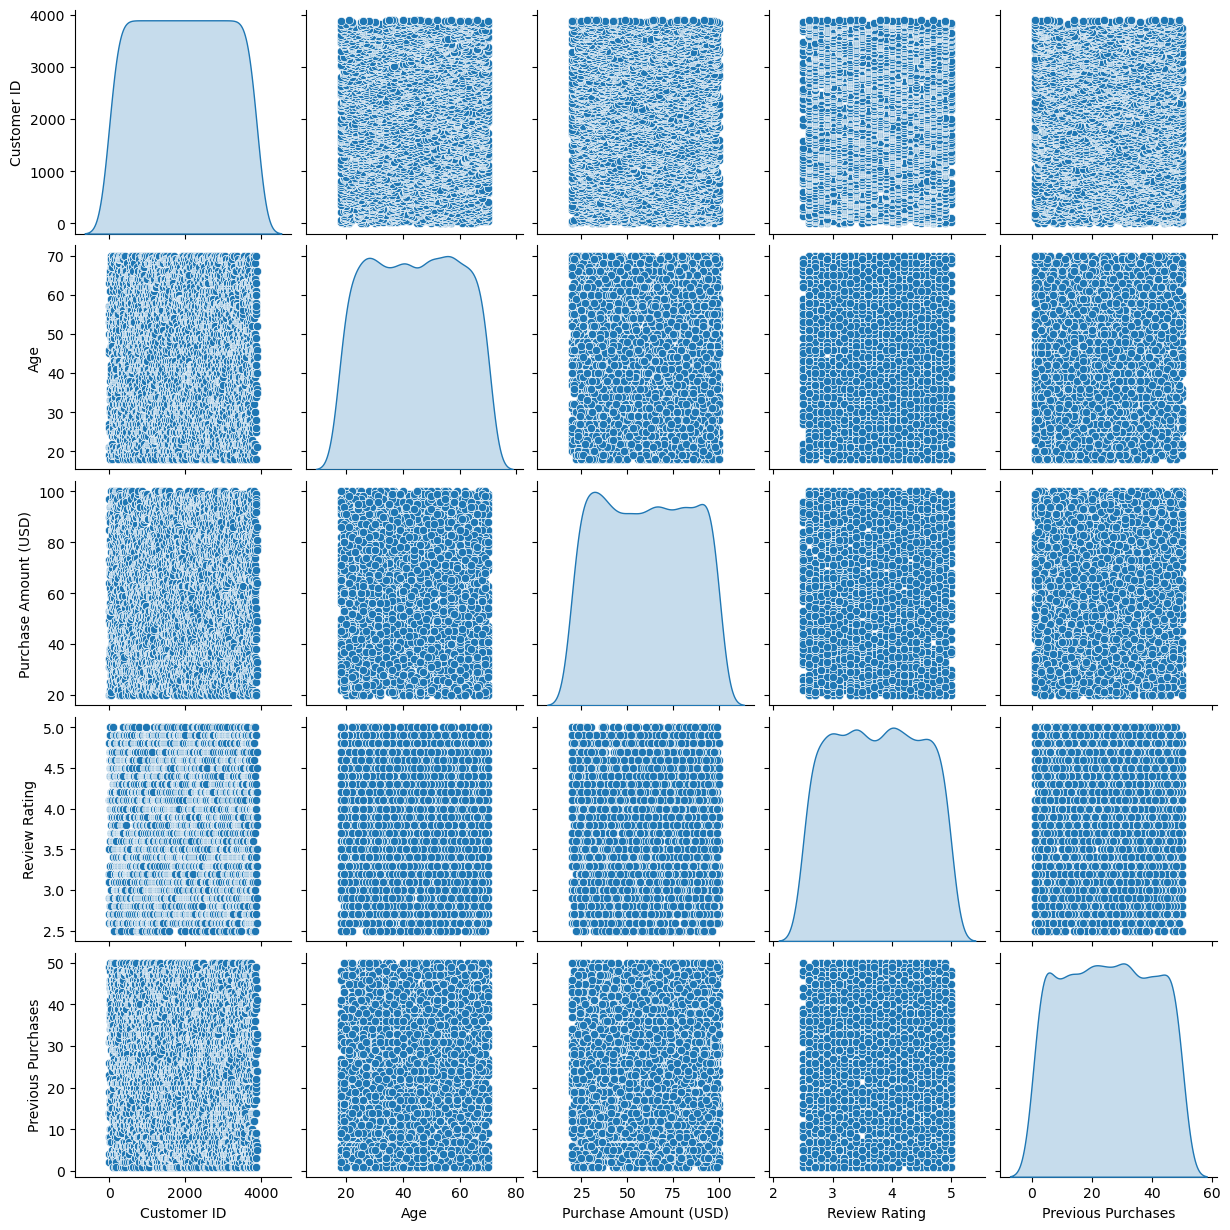

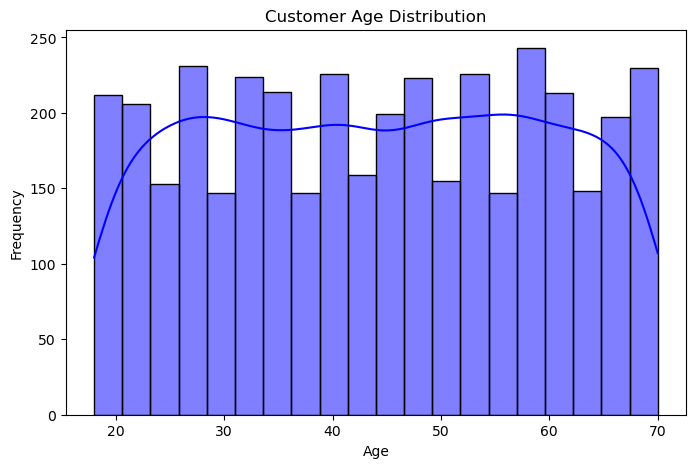

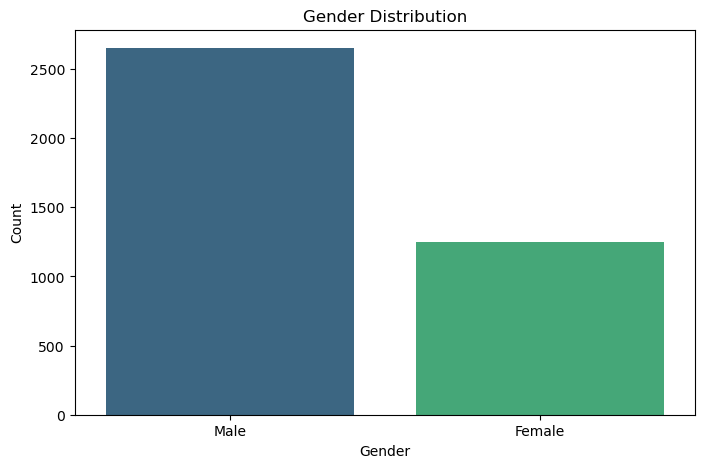

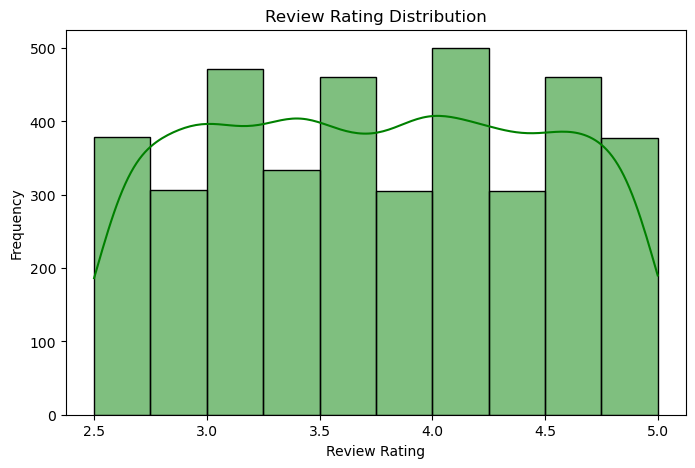

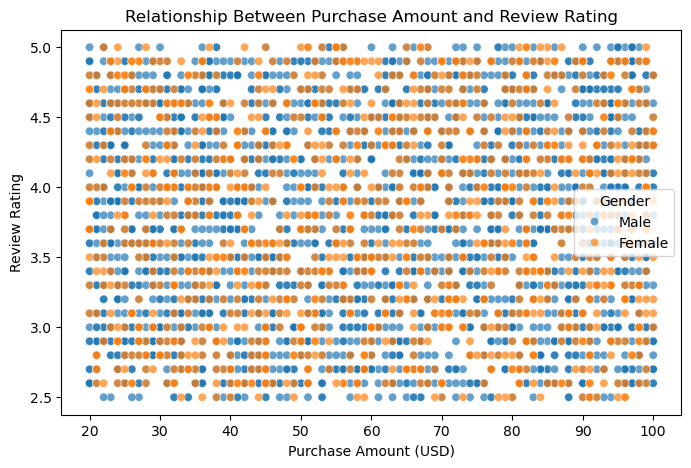

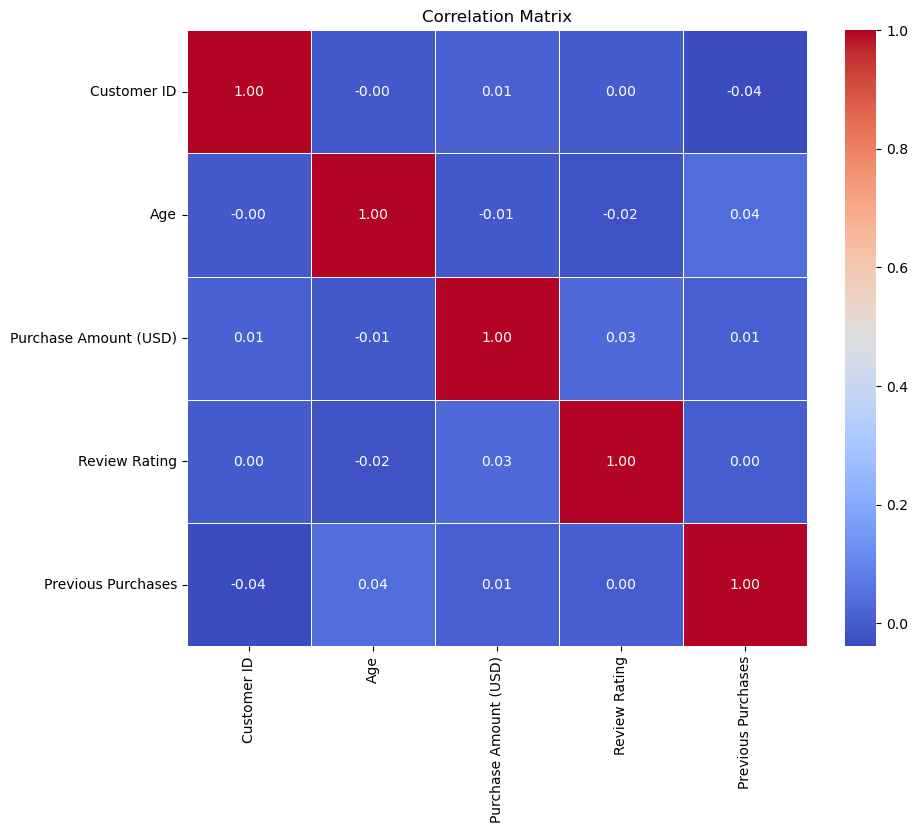

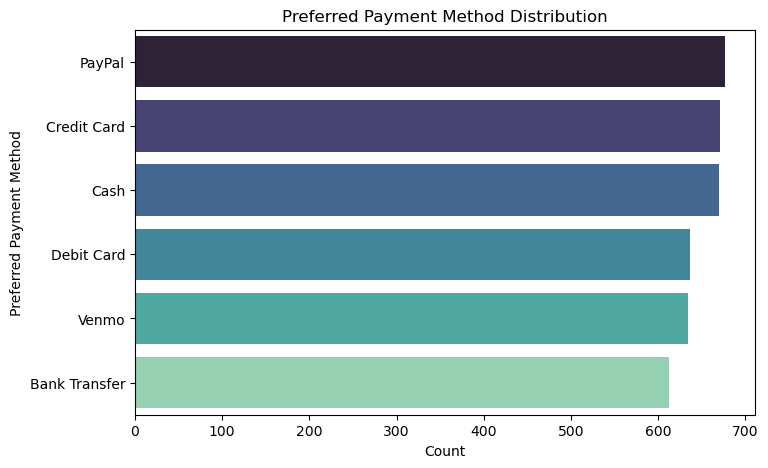

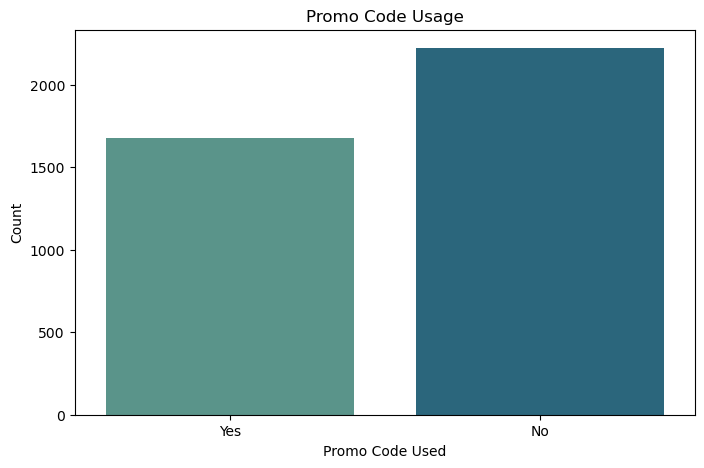


=== Top 5 Most Purchased Items ===
Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64


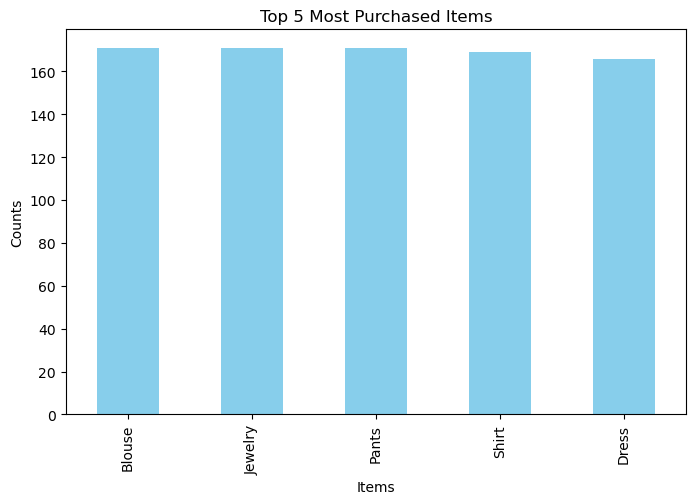

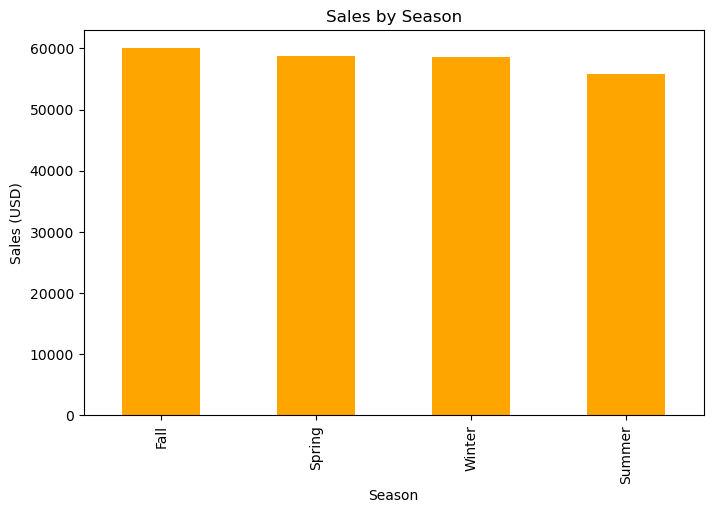


=== Outlier Analysis for Age ===
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


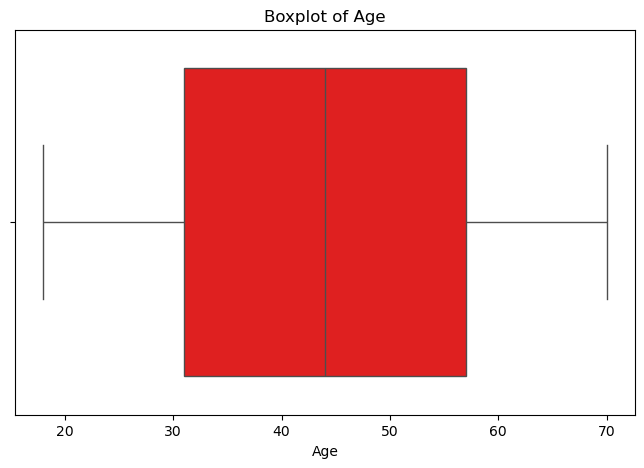


=== Outlier Analysis for Purchase Amount (USD) ===
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


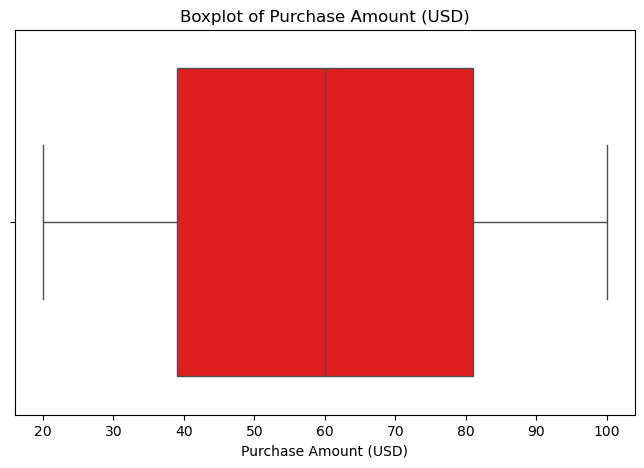


=== Outlier Analysis for Review Rating ===
count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64


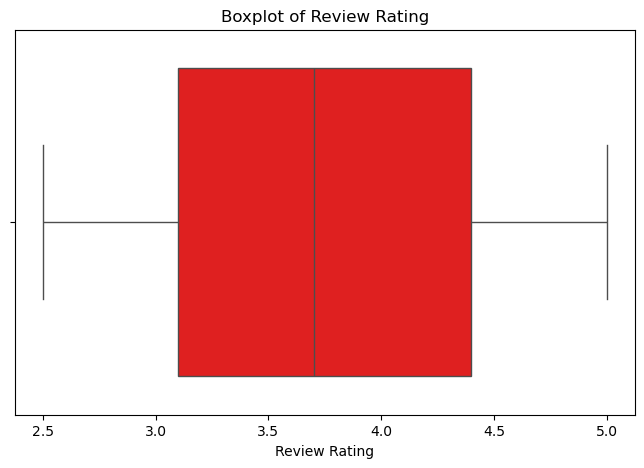


=== Outlier Analysis for Previous Purchases ===
count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64


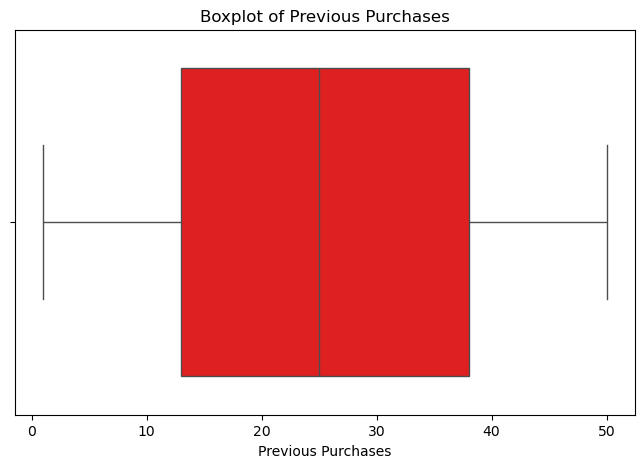


=== Correlation with Review Rating ===
Review Rating                     1.000000
Log Review Rating                 0.997581
Exponential_Review                0.996284
Age_Rating_Interaction            0.460088
Effective Purchase Amount         0.032016
Purchase Amount (USD)             0.030776
Size                              0.027603
Customer Value                    0.025147
Log Purchase Amount               0.024052
Gender                            0.008164
Payment_Match                     0.005084
Previous Purchases                0.004229
Average Frequency                 0.003644
Customer ID                       0.001343
Season                            0.000160
Payment Method                   -0.003077
Location                         -0.004222
Subscription Status              -0.006368
Shipping Type                    -0.009787
Discount Rate                    -0.012486
Subscription_Promo_Interaction   -0.012486
Promo Code Used                  -0.012486
Age           

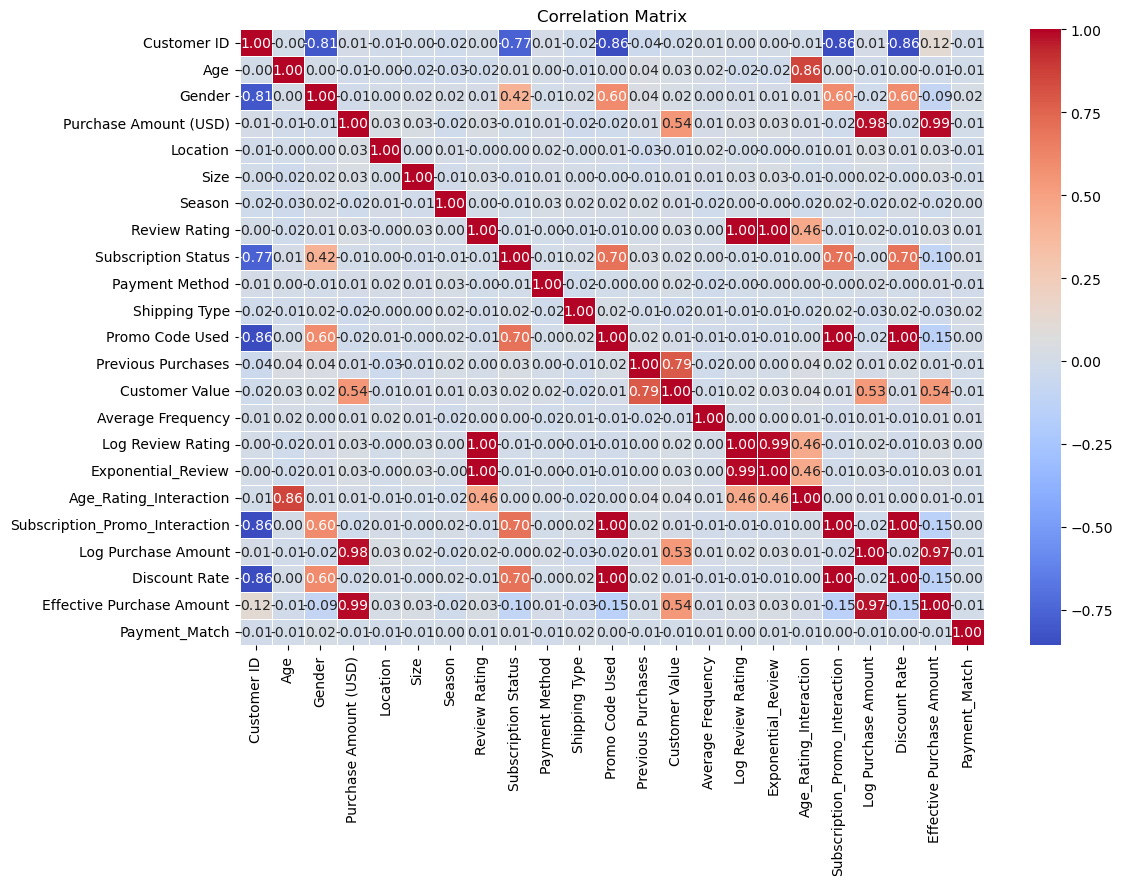

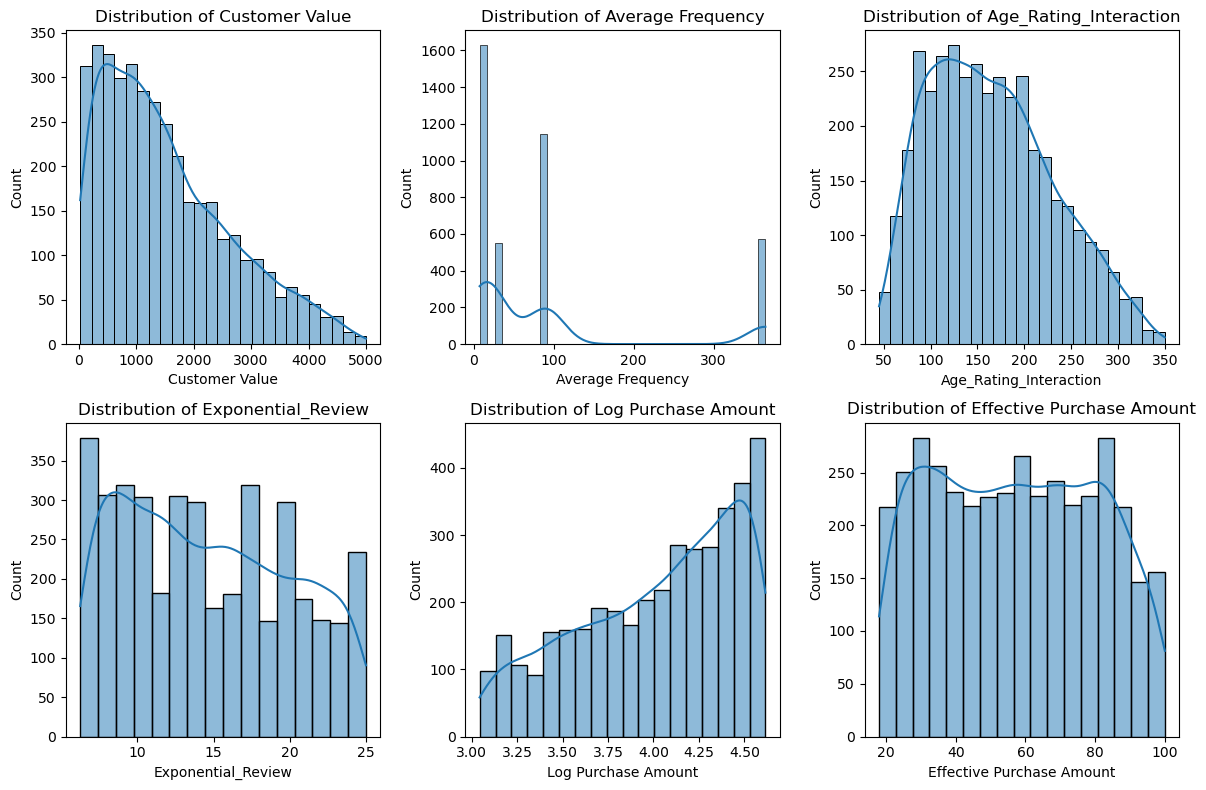

In [11]:
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()
    #Data distribution Analysis
    ##Distribution of Age
    plt.figure(figsize=(8,5))
    sns.histplot(df['Age'], bins=20, kde=True, color='blue')
    plt.title('Customer Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
    ##Gender Distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Gender', palette='viridis')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
    ##Review Rating Distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Review Rating'], bins=10, kde=True, color='green')
    plt.title('Review Rating Distribution')
    plt.xlabel('Review Rating')
    plt.ylabel('Frequency')
    plt.show()
    #Exploring Relationships Between Variables
    ##Relationship Between Purchase Amount and Review Rating
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Purchase Amount (USD)', y='Review Rating', hue='Gender', alpha=0.7)
    plt.title('Relationship Between Purchase Amount and Review Rating')
    plt.xlabel('Purchase Amount (USD)')
    plt.ylabel('Review Rating')
    plt.legend(title='Gender')
    plt.show()
    ##Correlation Matrix for Numerical Variables
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    #Categorical Variables Analysis
    ##Preferred Payment Method Distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y='Preferred Payment Method', order=df['Preferred Payment Method'].value_counts().index, palette='mako')
    plt.title('Preferred Payment Method Distribution')
    plt.xlabel('Count')
    plt.ylabel('Preferred Payment Method')
    plt.show()
    ##Promo Code Usage
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Promo Code Used', palette='crest')
    plt.title('Promo Code Usage')
    plt.xlabel('Promo Code Used')
    plt.ylabel('Count')
    plt.show()
    #Advanced Insights
    ##Top 5 Most Purchased Items
    print('\n=== Top 5 Most Purchased Items ===')
    top_items=df['Item Purchased'].value_counts().head(5)
    print(top_items)
    plt.figure(figsize=(8, 5))
    top_items.plot(kind='bar', color='skyblue')
    plt.title('Top 5 Most Purchased Items')
    plt.xlabel('Items')
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.show()
    ##Sales by Season
    season_sales=df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    season_sales.plot(kind='bar', color='orange')
    plt.title('Sales by Season')
    plt.xlabel('Season')
    plt.ylabel('Sales (USD)')
    plt.xticks(rotation=90)
    plt.show()
    #Outlier Detection
    ##Outliers in Numerical Columns
    for column in ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']:
        print(f"\n=== Outlier Analysis for {column} ===")
        print(df[column].describe())
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=column, color ='red')
        plt.title(f"Boxplot of {column}")
        plt.show()
    #Experimenting with Attribute Combinations
    ##1. Data Preprocessing
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)
    ##2. Feature Engineering
    df['Customer Value']=df['Previous Purchases']*df['Purchase Amount (USD)']
    ##Map frequency of purchases to numeric values
    frequency_map = {
        'Weekly': 7,
        'Biweekly': 14,
        'Bi-Weekly': 14,
        'Fortnightly': 14,
        'Monthly': 30,
        'Every 3 Months': 90,
        'Quarterly': 90,
        'Annually': 365
    }
    df['Average Frequency'] = df['Frequency of Purchases'].map(frequency_map)
    ##If any values were not in the map, replace them with NaN
    df['Average Frequency'].fillna(np.nan, inplace=True)
    ##Convert 'Average Frequency' to integer after mapping
    df['Average Frequency'] = df['Average Frequency'].astype(float)
    df['Caterogy_Season']=df['Category'] + '_' + df['Season']
    df['Log Review Rating']=np.log1p(df['Review Rating'])
    df['Exponential_Review']=df['Review Rating'] ** 2
    df['Age_Rating_Interaction']=df['Age'] * df['Review Rating']
    df['Subscription_Promo_Interaction'] = ((df['Subscription Status'] == 'Subscribed').astype(int) +
                                             (df['Promo Code Used'] == 'Yes').astype(int))
    df['Log Purchase Amount']=np.log1p(df['Purchase Amount (USD)'])
    df['Discount Rate']=(df['Discount Applied'] == 'Yes').astype(int) * 0.1
    df['Effective Purchase Amount']=df['Purchase Amount (USD)'] * (1 - df['Discount Rate'])
    df['Payment_Match']=(df['Preferred Payment Method']==df['Payment Method']).astype(int)
    ##3. Label Encoding for categorical columns
    label_encoder=LabelEncoder()
    for col in ['Gender', 'Location', 'Size', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Promo Code Used']:
        df[col]=label_encoder.fit_transform(df[col])
    ##4. Correlation Analysis
    corr_matrix=df.corr(numeric_only=True)
    target_corr=corr_matrix['Review Rating'].sort_values(ascending=False)
    print('\n=== Correlation with Review Rating ===')
    print(target_corr)
    ##5. Visualize correlation heatmap and feature distributions
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    ##Distribution of newly created features
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(['Customer Value', 'Average Frequency', 'Age_Rating_Interaction', 'Exponential_Review', 'Log Purchase Amount', 'Effective Purchase Amount']):
        plt.subplot(2, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

eda_dataset(tre)

## Save data

In [13]:
tre.to_csv('trends.csv', index=False)